<a href="https://colab.research.google.com/github/ttogle918/AI_practice/blob/main/NER/NER_%EA%B0%9C%EC%9D%B8%EC%A0%95%EB%B3%B4(%EC%A3%BC%EC%86%8C)%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[monologg pipeline git](https://github.com/monologg/KoELECTRA-Pipeline)

### "monologg/koelectra-base-v3-naver-ner"

In [ ]:
def get_entity_per_word(str_dic_list) :
  result_li = []
  for dic_list in str_dic_list :
    result_li.append(get_location_index(dic_list))
  return result_li

def get_location_index(dic_list) :
  if len(dic_list) == 0 :
    return []
  start_idx, end_idx = -3, -3
  isLoc = False
  ret_list = []   # stack ==> .pop()
  word = ''

  for dic in dic_list :
    # 이어질 때
    if end_idx + 2  >= dic['start'] :    # 띄어쓰기, 마침표 때문에 +2까지 허용
      end_idx = dic['end']    # end index로 문장 길이 파악
      word += dic['word']
      if dic['entity'] == 'LOC-B' :
        isLoc = True

    else :    # 이어지지 않을 때
      # 이전 개체가 loc이라면 저장
      if isLoc == True :
        ret_list.append([start_idx, end_idx, word])
        isLoc = False

      start_idx = dic['start']
      end_idx = dic['end']
      word = dic['word']
      
      if dic['entity'] == 'LOC-B' :
        isLoc = True
  if isLoc == True :
    ret_list.append([start_idx, end_idx, word]) 
  return ret_list 
  
def replace_location(sentences, loc_li) :
  for i, locations in enumerate(loc_li) :
    if len(locations) == 0 :
      continue
    while len(locations) > 0 :
      start_idx, end_idx, word = locations.pop()
      sentences[i] = sentences[i][:start_idx] + '(주소)' + sentences[i][end_idx:]
  return sentences

In [ ]:
from transformers import ElectraTokenizer, ElectraForTokenClassification
# from ner_pipeline import NerPipeline
from transformers import pipeline
from pprint import pprint

model_name = "monologg/koelectra-base-v3-naver-ner"

# tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-small-finetuned-naver-ner")
# model = ElectraForTokenClassification.from_pretrained("monologg/koelectra-small-finetuned-naver-ner")

ner = pipeline(model=model_name)

# pprint(ner("2009년 7월 FC서울을 떠나 잉글랜드 프리미어리그 볼턴 원더러스로 이적한 이청용은 크리스탈 팰리스와 독일 분데스리가2 VfL 보훔을 거쳐 지난 3월 K리그로 컴백했다. 행선지는 서울이 아닌 울산이었다"))

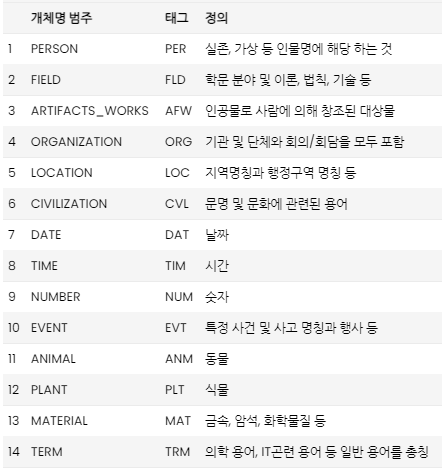

In [ ]:
# 220(숫자 지번) 인식못함, 단독 주택 인식못함
data = """
서울특별시 용산구 후암로16가길 4(후암동, 그랜드행남아파트)
희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ
주소는! 제주특별자치도 제주시 가가읍 고고로 000 단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??
010 0000 1111 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!
생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-010-7777-1111다시 한번 생신 추카드림미다!!
저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!
헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....
앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ 주소제주특별자치도 제주시 가가읍 기기로 111 입니다!
상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-010-7777-1111
흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. 송파구 동남로 300-0번지 9201호 입니더..
010 4444 5555 이에요 이벵 당첨자 입니다
01045678910 입니다
이벤트당첨 되서 왔습니다!!연락처: 010-3333-2828
이벵 당첨된 온리원에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용010-9999-6666기대되요><
선생님 이벵에 당첨됬어유후 전번 010 6666 3333 입니다! 오늘도 좋은 하루 되세요!
호호호 제가 1등이라니요~!!!!넘 감동입니댜 큨ㅋㅋ큐 ㅋㅋㅋ찌니쌤 넘 감사드려용~^^주소는 서울시 광진구 광나루로 00길 99 이랍니당~아 혹시 몰라서 전번은 010-7777-9999 이옵니당!!!!이번에 국어가 2개나 나뉘어 져서 제가 열공을 했다라도 금방 따라잡힐 것 같아요 ㅋㅋㅋ이번에 1,3단원 나가는데 지금 모음자음 체계표 외우라고 해서 열공하는 중이에욤!!!히힣찌니쌤 사룽합니덩 ㅋㅋㅋ(지니쌤 고등강의도 빨리 들어보구 싶어용!! 재밌을 것 같다라구요 ㅋㅋㅋ 이번에 고등 준비하면서 찾아봤는데 지니쌤이 똬악!!!! 바로 국어는 지니쌤으로 갑니다!!ㅋㅋㅋ)
"""
data = data.split('\n')
replace_location(data, get_entity_per_word(ner(data)))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['',
 '(주소))',
 '희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ',
 '주소는! (주소) 220 단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??',
 '010 9286 6806 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!',
 '생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-010-7579-1432다시 한번 생신 추카드림미다!!',
 '저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!',
 '헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....',
 '앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ (주소) 입니다!',
 '상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-010-7579-1432',
 '흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..',
 '010 4127 5988 이에요 이벵 당첨자 입니다',
 '01048289378 입니다',
 '이벤트당첨 되서 왔습니다!!연락처: 010-3860-2828',
 '이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용010-9286-6806기대되

In [ ]:
ner = pipeline(model=model_name, )
data = """(주소)(후암동, 그랜드행남아파트)
희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ
주소는! (주소)단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??
(휴대폰번호) 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!
생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-(휴대폰번호)다시 한번 생신 추카드림미다!!
저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!
헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....
앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ (주소)입니다!
상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-(휴대폰번호)
흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..
(휴대폰번호) 이에요 이벵 당첨자 입니다
(휴대폰번호) 입니다
이벤트당첨 되서 왔습니다!!연락처: (휴대폰번호)
이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용(휴대폰번호)기대되요><
선생님 이벵에 당첨됬어유후 전번 (휴대폰번호) 입니다! 오늘도 좋은 하루 되세요!
호호호 제가 1등이라니요~!!!!넘 감동입니댜 큨ㅋㅋ큐 ㅋㅋㅋ찌니쌤 넘 감사드려용~^^주소는 (주소)길 41 이랍니당~아 혹시 몰라서 전번은 (휴대폰번호) 이옵니당!!!!이번에 국어가 2개나 나뉘어 져서 제가 열공을 했다라도 금방 따라잡힐 것 같아요 ㅋㅋㅋ이번에 1,3단원 나가는데 지금 모음자음 체계표 외우라고 해서 열공하는 중이에욤!!!히힣찌니쌤 사룽합니덩 ㅋㅋㅋ(지니쌤 고등강의도 빨리 들어보구 싶어용!! 재밌을 것 같다라구요 ㅋㅋㅋ 이번에 고등 준비하면서 찾아봤는데 지니쌤이 똬악!!!! 바로 국어는 지니쌤으로 갑니다!!ㅋㅋㅋ)
"""
data = data.split('\n')
# pprint(ner(["서울특별시 용산구 후암로16가길 4(후암동, 그랜드행남아파트)", "희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ"]))
data

['(주소)(후암동, 그랜드행남아파트)',
 '희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ',
 '주소는! (주소)단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??',
 '(휴대폰번호) 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!',
 '생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-(휴대폰번호)다시 한번 생신 추카드림미다!!',
 '저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!',
 '헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....',
 '앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ (주소)입니다!',
 '상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-(휴대폰번호)',
 '흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..',
 '(휴대폰번호) 이에요 이벵 당첨자 입니다',
 '(휴대폰번호) 입니다',
 '이벤트당첨 되서 왔습니다!!연락처: (휴대폰번호)',
 '이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용(휴대폰번호)기대되요><',
 '선생님 이벵에 당첨됬어유후 전번 (휴대폰번호) 입니다

### "monologg/koelectra-small-finetuned-naver-ner"

In [ ]:
from transformers import ElectraTokenizer, ElectraForTokenClassification
from transformers import pipeline
from pprint import pprint

model_name = "monologg/koelectra-small-finetuned-naver-ner"

ner = pipeline(model=model_name)

In [ ]:
#  이디야 마스카포네 티라미슈 ==> 주소로 됨
data = """
서울특별시 용산구 후암로16가길 4(후암동, 그랜드행남아파트)
희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ
주소는! 제주특별자치도 제주시 가가읍 고고로 000 단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??
010 0000 1111 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!
생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-010-7777-1111다시 한번 생신 추카드림미다!!
저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!
헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....
앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ 주소제주특별자치도 제주시 가가읍 기기로 111 입니다!
상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-010-7777-1111
흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. 송파구 동남로 300-0번지 9201호 입니더..
010 4444 5555 이에요 이벵 당첨자 입니다
01045678910 입니다
이벤트당첨 되서 왔습니다!!연락처: 010-3333-2828
이벵 당첨된 온리원에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용010-9999-6666기대되요><
선생님 이벵에 당첨됬어유후 전번 010 6666 3333 입니다! 오늘도 좋은 하루 되세요!
호호호 제가 1등이라니요~!!!!넘 감동입니댜 큨ㅋㅋ큐 ㅋㅋㅋ찌니쌤 넘 감사드려용~^^주소는 서울시 광진구 광나루로 00길 99 이랍니당~아 혹시 몰라서 전번은 010-7777-9999 이옵니당!!!!이번에 국어가 2개나 나뉘어 져서 제가 열공을 했다라도 금방 따라잡힐 것 같아요 ㅋㅋㅋ이번에 1,3단원 나가는데 지금 모음자음 체계표 외우라고 해서 열공하는 중이에욤!!!히힣찌니쌤 사룽합니덩 ㅋㅋㅋ(지니쌤 고등강의도 빨리 들어보구 싶어용!! 재밌을 것 같다라구요 ㅋㅋㅋ 이번에 고등 준비하면서 찾아봤는데 지니쌤이 똬악!!!! 바로 국어는 지니쌤으로 갑니다!!ㅋㅋㅋ)
"""

data = data.split('\n')
replace_location(data, get_entity_per_word(ner(data)))

['',
 '(주소))',
 '희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ',
 '주소는! (주소)주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??',
 '010 9286 6806 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!',
 '생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-010-7579-1432다시 한번 생신 추카드림미다!!',
 '저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!',
 '헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....',
 '앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ 주소제주특별자치도 (주소) 입니다!',
 '상품은 (주소)로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-010-7579-1432',
 '흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..',
 '010 4127 5988 이에요 이벵 당첨자 입니다',
 '01048289378 입니다',
 '이벤트당첨 되서 왔습니다!!연락처: 010-3860-2828',
 '이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용010-9286-6806기대되요><',
 

In [ ]:
ner = pipeline(model=model_name, )
data = """(주소)(후암동, 그랜드행남아파트)
희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ
주소는! (주소)단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??
(휴대폰번호) 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!
생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-(휴대폰번호)다시 한번 생신 추카드림미다!!
저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!
헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....
앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ (주소)입니다!
상품은 이디야 마스카포네 티라미슈로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-(휴대폰번호)
흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..
(휴대폰번호) 이에요 이벵 당첨자 입니다
(휴대폰번호) 입니다
이벤트당첨 되서 왔습니다!!연락처: (휴대폰번호)
이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용(휴대폰번호)기대되요><
선생님 이벵에 당첨됬어유후 전번 (휴대폰번호) 입니다! 오늘도 좋은 하루 되세요!
호호호 제가 1등이라니요~!!!!넘 감동입니댜 큨ㅋㅋ큐 ㅋㅋㅋ찌니쌤 넘 감사드려용~^^주소는 (주소)길 41 이랍니당~아 혹시 몰라서 전번은 (휴대폰번호) 이옵니당!!!!이번에 국어가 2개나 나뉘어 져서 제가 열공을 했다라도 금방 따라잡힐 것 같아요 ㅋㅋㅋ이번에 1,3단원 나가는데 지금 모음자음 체계표 외우라고 해서 열공하는 중이에욤!!!히힣찌니쌤 사룽합니덩 ㅋㅋㅋ(지니쌤 고등강의도 빨리 들어보구 싶어용!! 재밌을 것 같다라구요 ㅋㅋㅋ 이번에 고등 준비하면서 찾아봤는데 지니쌤이 똬악!!!! 바로 국어는 지니쌤으로 갑니다!!ㅋㅋㅋ)
"""
data = data.split('\n')
replace_location(data, get_entity_per_word(ner(data)))

# pprint(ner(["서울특별시 용산구 후암로16가길 4(후암동, 그랜드행남아파트)", "희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ"]))
data

['(주소)(주소))',
 '희희 당첨 돼서 기분이 좋네용 ㅎㅂㅎ',
 '주소는! (주소)단독주택입니다! 진짜 하이 너무 이뻐여ㅠㅠㅠㅠㅠ 어떤 앱(?)으로 만드시는지 질문해도 되나여??',
 '(휴대폰번호) 오레오요!!성생님 당첨 안됐는데도 과자 감사해요!',
 '생일 추카 이벵트 까까 오레오로 부탁드리겠슴미다!!전번-(휴대폰번호)다시 한번 생신 추카드림미다!!',
 '저저!! 참여했어요!! 허쉬 드링크요ㅠㅠ!! 진쨔 감사합미댜!!',
 '헐루ㅜㅜㅜ제가 제일 많이 모았구뇨...!뽑아주셔서 감사해요ㅜㅜㅜㅜ저 내일 현장체험학습으로 동물원가는데...갑자기 뉴스에서 비온다고 하길래...애들한테 알려줬더니...다행히도 내일 오후12시에서 1시 정도에 비가 온다하더라구용(12시에 끝납니당너무나도 다행이에요...!!ㅜㅜㅜ아!그리구 면담숙제 때문에이따가 면담 질문 보낼게용~그러면 다음 질답을....',
 '앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 진짜 이거 캡쳐하고 5분동언 계속 웃었어요 ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅋㅋㅌㅋ혼자 보기 너무 아깝네요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '진심으로 살면서 몇안되는 당첨에 제가 이르케 되버리다니ㅠㅠ쌤이라서 하는 말인데 사실 저 오늘 개학하고 학교갔는데애들하고도 반하고도 적응 못해서 겉도느라 엄청 속상했는데오늘 이케 당첨이 되니까 ㅠㅠ 속상했던거 다 까먹은거 같애여♡암튼 ㅎㅎ (주소)입니다!',
 '상품은 (주소)로 해 주시면 감사하겠습니다ㅜㅜ와ㅏㅏㅏ전번-(휴대폰번호)',
 '흑ㅜㅜ 바보같이 당첨되서 좋아하기만 하구 주소는 안썼네용.. (주소)번지 201호 입니더..',
 '(휴대폰번호) 이에요 이벵 당첨자 입니다',
 '(휴대폰번호) 입니다',
 '이벤트당첨 되서 왔습니다!!연락처: (휴대폰번호)',
 '이벵 당첨된 오민서에영뭐가 당첨된지 기억도 안나욬ㅋㅋㅋㅋㅋㅋㅋ다시 보니까 사회적 거리두기네용(휴대폰번호)기대되요><',
 '선생님 이벵에 당첨됬어유후 전번 (휴대폰번호) 입니다! 오늘도 좋은 하루 되세요!',
 